In [6]:
import pandas as pd

base_dir = "/kaggle/input/jane-street-real-time-market-data-forecasting/train.parquet"
df = pd.read_parquet(f'{base_dir}/partition_id=7/part-0.parquet')

In [7]:
# Sort the DataFrame
df = df.sort_values(by=['symbol_id', 'date_id', 'time_id'])
df = df.reset_index(drop=True)
df.head(100)


,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,1190,0,0,2.888326,0.928983,0.441290,1.352455,1.301461,2.302733,-0.231061,...,-0.203992,-0.257635,-0.254294,-0.100387,-0.390012,-1.553783,0.224214,-0.278927,-1.170454,0.546211
1,1190,1,0,2.888326,0.812045,0.287618,0.781931,0.862262,1.999738,-0.078465,...,-0.294544,-0.304375,-0.250175,0.242523,-0.562048,-1.679339,0.104258,-0.492223,-2.278074,-0.096518
2,1190,2,0,2.888326,1.564986,0.848806,0.845978,0.934356,2.146238,-0.020378,...,-0.194655,-0.269392,-0.376987,-0.162672,-1.052235,-1.176147,0.202343,-1.118208,-1.336344,0.471153
3,1190,3,0,2.888326,1.646784,0.556938,1.245883,1.384533,2.333363,-0.051726,...,-0.308909,-0.396191,-0.373662,-0.249862,-0.805066,-1.410163,0.085549,-0.550099,-1.818652,0.378067
4,1190,4,0,2.888326,1.048084,0.593710,0.952669,1.393819,1.513835,-0.096590,...,-0.297132,0.057213,-0.049167,0.489998,-0.336325,-1.074370,0.571558,-0.567549,-1.555979,0.374713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1190,95,0,2.888326,0.899313,0.872655,0.611904,0.800270,1.672438,0.091263,...,-0.238560,0.008676,-0.086372,0.032918,-0.112259,-0.088120,-0.338452,-0.069689,0.000172,-0.464786
96,1190,96,0,2.888326,1.152360,0.658832,0.786550,0.733082,1.936692,-0.055169,...,-0.291433,-0.016981,-0.095687,-0.091012,-0.149680,-0.272296,-0.294019,-0.130946,-0.178600,-0.216201
97,1190,97,0,2.888326,0.951265,0.968181,1.005434,0.923703,1.711512,-0.090984,...,-0.235122,-0.006187,-0.098262,-0.108648,-0.178640,-0.211416,-0.172619,-0.174573,-0.113896,-0.192201
98,1190,98,0,2.888326,0.944483,1.020565,0.983124,0.972003,1.554945,-0.003110,...,-0.336540,-0.022539,-0.096584,0.087890,0.077090,-0.070816,0.578915,0.150257,0.004600,0.944588


In [8]:
processed_groups = pd.DataFrame(columns = ['Symbol ID', 'Dropped Columns', 'Filled Columns', '% Filled'])

percentage_threshold = 10.0

for symbol_id, group in df.groupby('symbol_id'):

    # print(f"\nSymbol ID: {symbol_id}")
    # processed_groups['Symbol ID'].append(symbol_id)

    dropped_columns = []
    filled_columns = []
    percent_filled = []

    for feature in group.columns:
        total_rows = len(group)
        empty_rows = group[feature].isnull().sum()
        empty_rows_percentage = (empty_rows / total_rows) * 100
        nonempty_rows_percentage = 100 - empty_rows_percentage
    
        # print(f'{feature} : empty row = {empty_rows_percentage:.2f}% - non empty rows = {nonempty_rows_percentage:.2f}%')  

        if empty_rows == total_rows or empty_rows_percentage >= percentage_threshold:
            df = df.drop(columns=feature)
            dropped_columns.append(feature)
            
        elif empty_rows > 0:
            # Forward-fill and backward-fill missing values
            df.loc[group.index,feature] = group[feature].ffill().bfill()
            filled_columns.append(feature)
            percent_filled.append(empty_rows_percentage)

    # print(f"Symbol ID: {symbol_id}")
    # print(f"Dropped Columns: {dropped_columns}")
    # print(f"Filled Columns: {filled_columns}")
    # print(f"% Filled: {percent_filled}")



    # Check if there is data to add to the DataFrame
    
    if dropped_columns or filled_columns or percent_filled:
        # new row for table
        new_row = pd.DataFrame({
            'Symbol ID': [symbol_id],
            'Dropped Columns': [dropped_columns],
            'Filled Columns': [filled_columns],
            '% Filled': [percent_filled]
        })

    
    processed_groups = pd.concat([processed_groups, new_row], ignore_index=True)



print(processed_groups)
    




        

   Symbol ID                                   Dropped Columns  \
0          0                                                []   
1          1                                                []   
2          2                                                []   
3          3                                                []   
4          4                                                []   
5          5                                                []   
6          6                                                []   
7          7                                                []   
8          8                                                []   
9          9  [feature_21, feature_26, feature_27, feature_31]   
10        10                                                []   
11        11                                                []   
12        12                                                []   
13        13                                                []   
14        

In [4]:
# this is just a double check

null_columns = df.columns[df.isnull().any()]

print(null_columns)

Index([], dtype='object')


In [5]:
df.columns

Index(['date_id', 'time_id', 'symbol_id', 'weight', 'feature_00', 'feature_01',
       'feature_02', 'feature_03', 'feature_04', 'feature_05', 'feature_06',
       'feature_07', 'feature_08', 'feature_09', 'feature_10', 'feature_11',
       'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16',
       'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_22',
       'feature_23', 'feature_24', 'feature_25', 'feature_28', 'feature_29',
       'feature_30', 'feature_32', 'feature_33', 'feature_34', 'feature_35',
       'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40',
       'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45',
       'feature_46', 'feature_47', 'feature_48', 'feature_49', 'feature_50',
       'feature_51', 'feature_52', 'feature_53', 'feature_54', 'feature_55',
       'feature_56', 'feature_57', 'feature_58', 'feature_59', 'feature_60',
       'feature_61', 'feature_62', 'feature_63', 'feature_64', 'feature_6

- `date_id` and `time_id` - Integer values that are ordinally sorted, providing a chronological structure to the data, although the **actual time intervals** between `time_id` values may vary.
- `symbol_id` - Identifies a unique financial instrument. Each row in the dataset corresponds to a unique combination of a symbol (identified by `symbol_id`) and a timestamp (represented by `date_id` and `time_id`). The `symbol_id` column contains encrypted identifiers. Each `symbol_id` is not guaranteed to appear in all `time_id` and `date_id` combinations.
- `weight` - The weighting used for calculating the scoring function.
- `feature_{00...78}` - Anonymized market data.
- `responder_{0...8}` - Anonymized responders clipped between -5 and 5. The responder_6 field is what you are trying to predict.

In [6]:
TEMPORAL_FEATURES = ['date_id', 'time_id','symbol_id']
MARKET_FEATURES = [f'feature_{i:02}' for i in range(0,79)]
RESPONDER_FEATURES = [f'responder_{i}' for i in range(0,9)]
RESPONDER_FEATURES.remove('responder_6')
SYMBOL_FEATURES = ['symbol_id']
WEIGHT = ['WEIGHT']

In [7]:
df.head(100)

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,1190,0,0,2.888326,0.928983,0.441290,1.352455,1.301461,2.302733,-0.231061,...,-0.203992,-0.257635,-0.254294,-0.100387,-0.390012,-1.553783,0.224214,-0.278927,-1.170454,0.546211
1,1190,1,0,2.888326,0.812045,0.287618,0.781931,0.862262,1.999738,-0.078465,...,-0.294544,-0.304375,-0.250175,0.242523,-0.562048,-1.679339,0.104258,-0.492223,-2.278074,-0.096518
2,1190,2,0,2.888326,1.564986,0.848806,0.845978,0.934356,2.146238,-0.020378,...,-0.194655,-0.269392,-0.376987,-0.162672,-1.052235,-1.176147,0.202343,-1.118208,-1.336344,0.471153
3,1190,3,0,2.888326,1.646784,0.556938,1.245883,1.384533,2.333363,-0.051726,...,-0.308909,-0.396191,-0.373662,-0.249862,-0.805066,-1.410163,0.085549,-0.550099,-1.818652,0.378067
4,1190,4,0,2.888326,1.048084,0.593710,0.952669,1.393819,1.513835,-0.096590,...,-0.297132,0.057213,-0.049167,0.489998,-0.336325,-1.074370,0.571558,-0.567549,-1.555979,0.374713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1190,95,0,2.888326,0.899313,0.872655,0.611904,0.800270,1.672438,0.091263,...,-0.238560,0.008676,-0.086372,0.032918,-0.112259,-0.088120,-0.338452,-0.069689,0.000172,-0.464786
96,1190,96,0,2.888326,1.152360,0.658832,0.786550,0.733082,1.936692,-0.055169,...,-0.291433,-0.016981,-0.095687,-0.091012,-0.149680,-0.272296,-0.294019,-0.130946,-0.178600,-0.216201
97,1190,97,0,2.888326,0.951265,0.968181,1.005434,0.923703,1.711512,-0.090984,...,-0.235122,-0.006187,-0.098262,-0.108648,-0.178640,-0.211416,-0.172619,-0.174573,-0.113896,-0.192201
98,1190,98,0,2.888326,0.944483,1.020565,0.983124,0.972003,1.554945,-0.003110,...,-0.336540,-0.022539,-0.096584,0.087890,0.077090,-0.070816,0.578915,0.150257,0.004600,0.944588


In [9]:
# Normalize Features

from sklearn.preprocessing import StandardScaler

df_feature_cols = []
possible_feature_cols = [f'feature_{i:02}' for i in range(0,79)]

for feature in df.columns:
    if feature in possible_feature_cols:
        df_feature_cols.append(feature)

std_scaler = StandardScaler()
df[df_feature_cols] = std_scaler.fit_transform(df[df_feature_cols])

# Need to oneHot encode the symbol variable to be a category

In [9]:
df.head(100)

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,1190,0,0,2.888326,-0.109961,0.348639,0.219882,0.180069,2.025294,-0.102465,...,-0.218812,-0.257635,-0.254294,-0.100387,-0.390012,-1.553783,0.224214,-0.278927,-1.170454,0.546211
1,1190,1,0,2.888326,-0.201104,0.222629,-0.227093,-0.163766,1.758053,0.038524,...,-0.335070,-0.304375,-0.250175,0.242523,-0.562048,-1.679339,0.104258,-0.492223,-2.278074,-0.096518
2,1190,2,0,2.888326,0.385749,0.682802,-0.176916,-0.107326,1.887265,0.092192,...,-0.206824,-0.269392,-0.376987,-0.162672,-1.052235,-1.176147,0.202343,-1.118208,-1.336344,0.471153
3,1190,3,0,2.888326,0.449504,0.443471,0.136389,0.245104,2.052309,0.063229,...,-0.353514,-0.396191,-0.373662,-0.249862,-0.805066,-1.410163,0.085549,-0.550099,-1.818652,0.378067
4,1190,4,0,2.888326,-0.017132,0.473624,-0.093329,0.252373,1.329487,0.021778,...,-0.338394,0.057213,-0.049167,0.489998,-0.336325,-1.074370,0.571558,-0.567549,-1.555979,0.374713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1190,95,0,2.888326,-0.133087,0.702359,-0.360300,-0.212297,1.469375,0.195341,...,-0.263193,0.008676,-0.086372,0.032918,-0.112259,-0.088120,-0.338452,-0.069689,0.000172,-0.464786
96,1190,96,0,2.888326,0.064142,0.527023,-0.223475,-0.264897,1.702447,0.060048,...,-0.331077,-0.016981,-0.095687,-0.091012,-0.149680,-0.272296,-0.294019,-0.130946,-0.178600,-0.216201
97,1190,97,0,2.888326,-0.092594,0.780690,-0.051990,-0.115666,1.503838,0.026957,...,-0.258780,-0.006187,-0.098262,-0.108648,-0.178640,-0.211416,-0.172619,-0.174573,-0.113896,-0.192201
98,1190,98,0,2.888326,-0.097880,0.823644,-0.069469,-0.077853,1.365746,0.108147,...,-0.388988,-0.022539,-0.096584,0.087890,0.077090,-0.070816,0.578915,0.150257,0.004600,0.944588


In [10]:
X = df.drop(columns = ['responder_1', 'responder_2', 'responder_3', 'responder_4', 'responder_5', 'responder_6', 'responder_7', 'responder_8', 'weight'])
y = df['responder_6']




In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Gaussian Naive Bayes

In [12]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

# poly_features = PolynomialFeatures(degree=2, include_bias=False)
# X_poly = poly_features.fit_transform(X_train)

# poly_reg = LinearRegression()
# poly_reg.fit(X_poly, y_train)

# poly_y_pred = poly_reg.predict(X_test)

# poly_mse = mean_squared_error(y_test,y_pred)
# print(f'Polynomial MSE = {gnb_mse}')

## Linear Regression with Ridge, Lasso, and Elastic

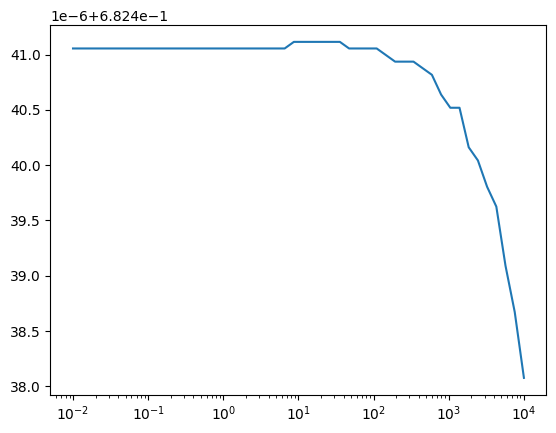

Minimum MSE = 0.68243807554245 at alpha = 10000.0


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


# Ridge Regression
# Typical values of alpha are 0.01 to 10,000

ridge_mse = []

# 50 alpha values from 0.01 to 10000 in logarithmic scaling
alpha_counter = np.logspace(-2, 4, 50)  
# alpha_counter = np.arange(0.1,1000,0.1)

for a in alpha_counter:
    # Ridge Regression
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    ridge_y_pred = ridge.predict(X_test)
    ridge_mse.append(mean_squared_error(y_test, ridge_y_pred))

plt.plot(alpha_counter,ridge_mse)
plt.xscale('log')
plt.show()

# argmin() finds index of minimnum value
min_mse_index = np.argmin(ridge_mse)

print(f'Minimum MSE = {ridge_mse[min_mse_index]} at alpha = {alpha_counter[min_mse_index]}')

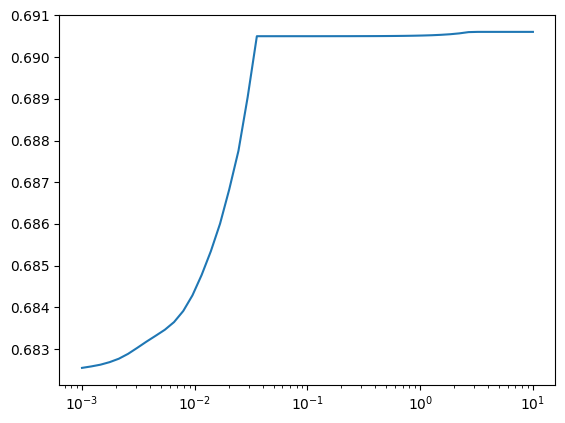

Minimum MSE = 0.6825464367866516 at alpha = 0.001


In [14]:
# Lasso Regression
# Typical values of alpha are 0.001 to 10


lasso_mse = []
Lalpha_counter = np.logspace(-3, 1, 50)  

for a in Lalpha_counter:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    lasso_y_pred = lasso.predict(X_test)
    lasso_mse.append(mean_squared_error(y_test, lasso_y_pred))
    
plt.plot(Lalpha_counter,lasso_mse)
plt.xscale('log')
plt.show()

# argmin() finds index of minimnum value
min_mse_index = np.argmin(lasso_mse)

print(f'Minimum MSE = {lasso_mse[min_mse_index]} at alpha = {Lalpha_counter[min_mse_index]}')


In [15]:
# Elastic Net Regression --> The combination of Ridge and Lasso

l1_alpha_values = np.logspace(-3, 2, 10)  # 10 values from 0.001 to 100
l1_ratios = np.linspace(0.1, 1.0, 10)  # 10 values from 0.1 to 1.0

elastic_mse_results = np.zeros( (len(l1_alpha_values), len(l1_ratios))  )

for i, a in enumerate(l1_alpha_values):
    for j, l1 in enumerate(l1_ratios):
        elastic_net = ElasticNet(alpha=a, l1_ratio=l1)
        elastic_net.fit(X_train, y_train)
        elastic_net_y_pred = elastic_net.predict(X_test)
        elastic_mse_results[i, j] = mean_squared_error(y_test, elastic_net_y_pred)



min_mse_index = np.unravel_index(np.argmin(elastic_mse_results, axis=None), elastic_mse_results.shape)
optimal_alpha = l1_alpha_values[min_mse_index[0]]
optimal_l1_ratio = l1_ratios[min_mse_index[1]]

print(f"Optimal Alpha: {optimal_alpha}")
print(f"Optimal L1 Ratio: {optimal_l1_ratio}")
print(f"Minimum MSE: {elastic_mse_results[min_mse_index]}")

Optimal Alpha: 0.001
Optimal L1 Ratio: 0.1
Minimum MSE: 0.6824395060539246


In [1]:
import tensorflow as tf

tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [15]:
# X_valid
# y_valid
input_shape=X_train.shape[1:]
print(input_shape)

(79,)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train_scaled.shape[1:]),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),

    # Single output neuron for regression
    # We want to predict just Responder_6
    tf.keras.layers.Dense(1, activation=None)
])

In [ ]:
model.compile(loss="mean_squared_error", 
              optimizer="sgd",
              metrics=["mse"])

model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

## Neural Net

THIS IS my CRAP FROM HERE ON OUT 

In [16]:
# empty_columns = []
# fully_filled_columns = []
# partially_empty_columns = []
# for feature in list(df.columns):
#     # empty_rows = df_pl[feature].is_null().sum()
#     # nonempty_rows = len(df_pl[feature]) - empty_rows
    
#     empty_rows_percentage = (df[feature].isnull().sum() / len(df))
#     nonempty_rows_percentage = 1.0 - empty_rows_percentage

#     print(f'{feature} : empty row = {empty_rows_percentage*100}% - non empty rows = {nonempty_rows_percentage*100}%')                                                                                 
                                                                                     

#     # ## store in feature_stats since recalculating empty rows for all 79 features takes a while
#     # if nonempty_rows == 0:
#     #     empty_columns.append(feature)

#     # elif empty_rows == 0:
#     #     fully_filled_columns.append(feature)

#     # else:
#     #     partially_empty_columns.append(feature)
    
#     # print(f'{feature} : total  - {len(df[[feature]])} - empty - {empty_rows} - nonempty - {nonempty_rows}')

In [17]:
# Sort by symbol id and by date/time:


# # Sort the DataFrame
# df = df.sort_values(by=['symbol_id', 'date_id', 'time_id'])

# # Group by 'symbol_id' and apply both ffill and bfill
# df = df.groupby('symbol_id').apply(lambda group: group.ffill().bfill()).reset_index(drop=True)



So we have 3 cases
1. Fully Empty columns : we can just drop them
2. Partially Empty Columns: we can impute them
3. Full Columns : No imputation necessary